## Analyse exploratoire série temporelle - fct_respiratory

In [30]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

In [8]:
#read data 

fct_respiratory = pd.read_csv('fct_respiratory.csv')
dim_patient = pd.read_csv('dim_patient.csv')
dates = dim_patient[['id_patient','date_transplantation']]

#merge two dataframes per id_patient

df = pd.merge(fct_respiratory, dates, on='id_patient')
df['timestamp'] = df['date_transplantation'] + '-' +df['time']

#remove time = 0 

df = df[df['time'] != '0']

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
a = sns.load_dataset("attention")

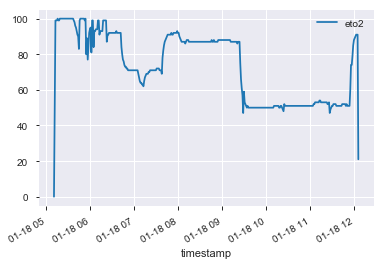

In [51]:
df[df['id_patient'] == 381].plot(y='eto2', x='timestamp')

In [22]:
df_melt = pd.melt(df, id_vars=['id_patient','timestamp'], value_vars=['etco2','eto2','fico2','fin2o','fr','fr_ecg','fio2','mac','peeptotal','pmax','pmean','pplat','rr_co2','spo2','svo2__m','vt'])

In [40]:
def plot_respiratory(id_patient):
    print 'Displaying respiratory measures for patient # {}'.format(id_patient)
    g = sns.FacetGrid(df_melt[df_melt['id_patient'] == id_patient], col="variable", col_wrap=4, sharey=False)
    g = g.map(plt.plot, "timestamp", "value")

Displaying respiratory measures for patient # 381


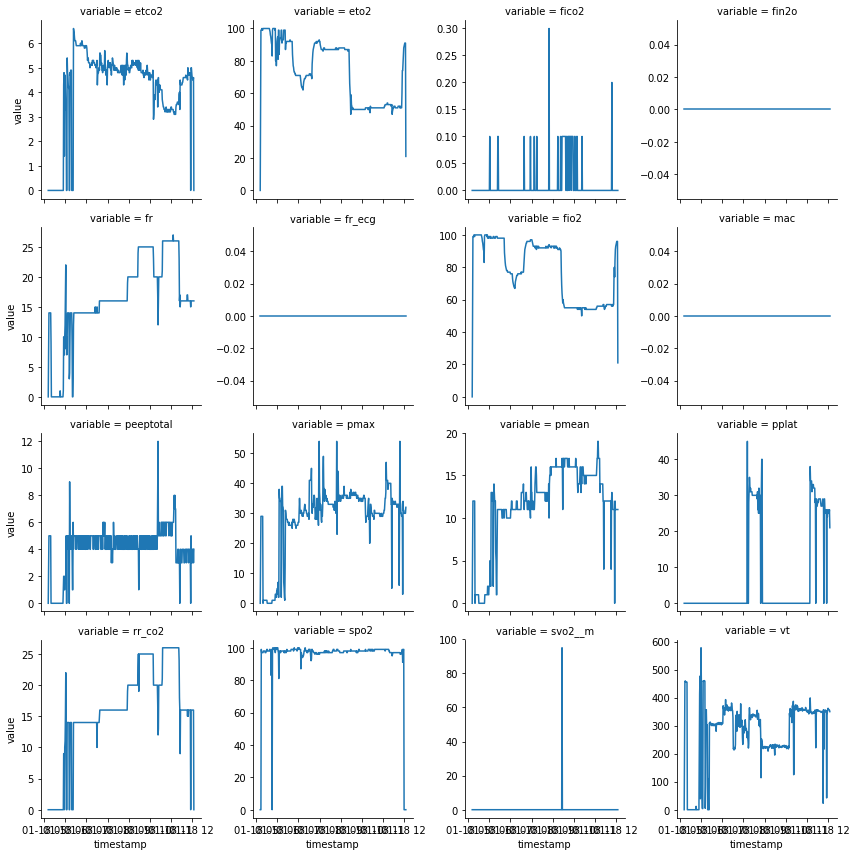

In [41]:
plot_respiratory(381)

In [33]:
fct_respiratory['hour'], fct_respiratory['minute'] = fct_respiratory['time'].str.split(':', 1).str

In [43]:
def parse_date(date):
    return datetime.strptime(date, "%Y-%m-%d %H:%M")

In [45]:
fct_respiratory['timestamp'].head()

0    2018-01-01  5:11
1    2018-01-01  5:13
2    2018-01-01  5:14
3    2018-01-01  5:15
4    2018-01-01  5:16
Name: timestamp, dtype: object

In [27]:
fct_respiratory['timestamp'] = '2018-01-01 ' + fct_respiratory['time']

In [8]:
fct_respiratory['time']

0          5:11
1          5:13
2          5:14
3          5:15
4          5:16
5          5:17
6          5:18
7          5:19
8          5:20
9          5:21
10         5:22
11         5:23
12         5:24
13         5:25
14         5:26
15         5:27
16         5:28
17         5:29
18         5:30
19         5:31
20         5:32
21         5:33
22         5:34
23         5:35
24         5:36
25         5:37
26         5:38
27         5:39
28         5:40
29         5:41
          ...  
141820    21:55
141821    21:56
141822    21:57
141823    21:58
141824    21:59
141825    22:00
141826    22:01
141827    22:02
141828    22:03
141829    22:04
141830    22:05
141831    22:06
141832    22:07
141833    22:08
141834    22:09
141835    22:10
141836    22:11
141837    22:12
141838    22:13
141839    22:14
141840    22:15
141841    22:16
141842    22:17
141843    22:18
141844    22:19
141845    22:20
141846    22:21
141847    22:22
141848    22:23
141849    22:24
Name: time, Length: 1418

In [46]:
parse_date('2018-01-01  5:11')

datetime.datetime(2018, 1, 1, 5, 11)

In [4]:
pandas_profiling.ProfileReport(fct_respiratory)

Number of variables,19
Number of observations,141850
Total Missing (%),0.0%
Total size in memory,20.6 MiB
Average record size in memory,152.0 B
Numeric,17
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1
